# Using Noise Vocoder

This notebook uses module 'noise_vocoder' which is based on the excellent notebook published by Alexandre Chabot-Leclerc ([@AlexChabotL](http://twitter.com/alexchabotl)).   https://github.com/achabotl/vocoder.git

In noise_vocoder.py, I added the "Shannon" vocoding scheme and altered some of the functions to be a little more general. I also converted the filtering to use sos coefficients, which improved the numerical stability of the code.  Keith Johnson

In [9]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

import noise_vocoder as nv

In [4]:
def compare_spectrogram(x, y, fs):
    """Plots spectrogram of x, the original, and y, the modified signal.
        uses matplotlib's specgram() function
    """
    fig, axes = plt.subplots(1, 2, sharey=True, figsize=(10, 4))

    p_x, *_, im  = axes[0].specgram(x, cmap='Greys', Fs=fs)
    vmin, vmax = 10 * np.log10([np.min(p_x), np.max(p_x)])
    _ = axes[1].specgram(y, cmap='Greys', Fs=fs, vmin=vmin, vmax=vmax)
    axes[0].set_title('Original')
    axes[1].set_title('Modified')
    for ax in axes:
        ax.set_xlabel('Time (s)')
        ax.grid(False)
    axes[0].set_ylabel('Frequency (Hz)')
    #cbar = fig.colorbar(im)
    #cbar.ax.set_ylabel('Magnitude (dB)')
    fig.tight_layout()

Using the sentence *[Cottage cheese with chives is delicious](http://www.ee.columbia.edu/~dpwe/sounds/sents/)*, from the [TIMIT](https://catalog.ldc.upenn.edu/LDC93S1) corpus of sentences.

In [5]:
from IPython.display import Audio

#!curl http://www.ee.columbia.edu/~dpwe/sounds/sents/sf3_cln.wav > sf3_cln.wav

fs, wav = sp.io.wavfile.read('sf3_cln.wav')
wav = wav.astype('float')  # default type is int

Audio(wav,rate=fs)

## 1/3 octave band vocoding

The frequency bands are at octave intervals: 100, 200, 400, 800, 1600, etc. and the bands are 1/3 of an octave wide.

number of 1/3 octave center freqs: 7


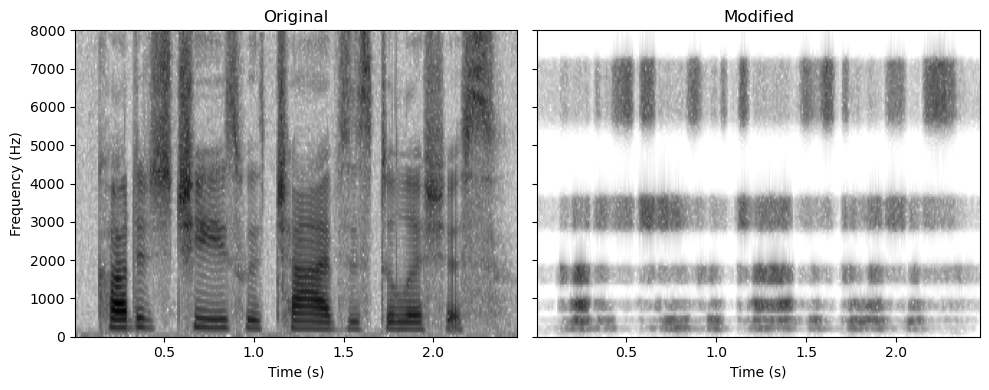

In [6]:
bands = nv.third_octave_bands(high=8000)  # define filter bank
third_octave_wav = nv.vocode(wav, bands, fs)  # use it

print(f'number of 1/3 octave center freqs: {len(bands)}')

compare_spectrogram(wav, third_octave_wav, fs)
Audio(third_octave_wav, rate=fs)

## Shannon style noise vocoding.

A specifiable number of frequency bands are equally spaced in log(Hz).


number of Shannon channels: 7


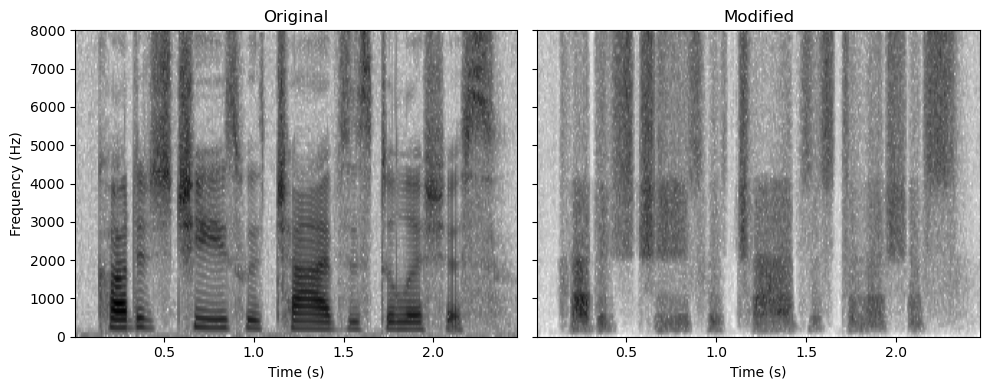

In [8]:
bands = nv.shannon_bands(nc=7,high=7999)
shannon_wav = nv.vocode(wav, bands, fs)

print(f'number of Shannon channels: {len(bands)}')

compare_spectrogram(wav, shannon_wav, fs)
Audio(shannon_wav, rate=fs)